<a href="https://colab.research.google.com/github/Elaheh-P/Breast_Cancer_Classification/blob/main/DL_session7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number Classification

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(train_features, train_labels) , (test_features , test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_features.shape , test_features.shape

((60000, 28, 28), (10000, 28, 28))

9


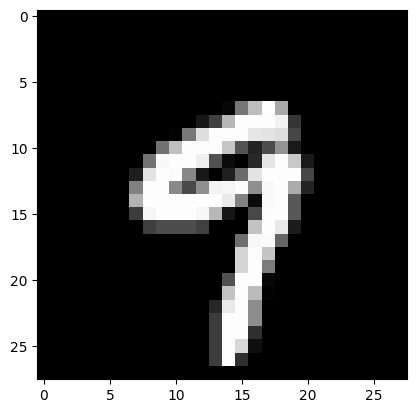

In [ ]:
idx = 10023
img = train_features[idx]

print(train_labels[idx])
plt.gray()
plt.imshow(img)

# Preprocessing

In [ ]:
np.min(img) , np.max(img)

(np.uint8(0), np.uint8(255))

In [ ]:
train_features = train_features / 255.0
test_features = test_features / 255.0

# Model Definition

In [ ]:
model = keras.Sequential ( [
    keras.layers.Flatten(input_shape = ( 28 , 28)),
    keras.layers.Dense(units = 128 , activation ='relu'),
    keras.layers.Dense( units = 128 , activation='relu'),
    keras.layers.Dense( units = 10  , activation ='softmax')
])

In [ ]:
model.compile( optimizer = tf.optimizers.Adam() , loss= tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'] )

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit( train_features , train_labels , epochs = 1000 , batch_size= 256 ,  validation_data = ( test_features , test_labels))

Epoch 1/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7999 - loss: 0.7355 - val_accuracy: 0.9457 - val_loss: 0.1832
Epoch 2/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9511 - loss: 0.1662 - val_accuracy: 0.9649 - val_loss: 0.1236
Epoch 3/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1091 - val_accuracy: 0.9683 - val_loss: 0.1040
Epoch 4/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.0853 - val_accuracy: 0.9709 - val_loss: 0.0910
Epoch 5/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0634 - val_accuracy: 0.9759 - val_loss: 0.0783
Epoch 6/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9769 - val_loss: 0.0814
Epoch 7/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0403 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 8/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0348 -

In [ ]:
idx = 100
img = test_features[idx]
print(test_labels[idx])

6


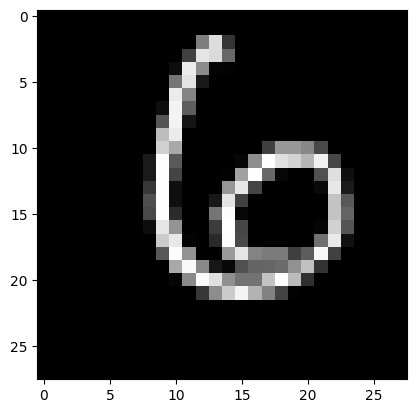

In [ ]:
plt.gray()
plt.imshow(img)

In [ ]:
test_data = np.reshape(img,(-1 , 28, 28))
test_data.shape

(1, 28, 28)

In [ ]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


array([[5.9263804e-33, 5.6636773e-38, 1.5247529e-41, 1.1583133e-41,
        0.0000000e+00, 1.6373659e-28, 1.0000000e+00, 4.2038954e-44,
        2.4415995e-32, 0.0000000e+00]], dtype=float32)

The model has predicted the number 6

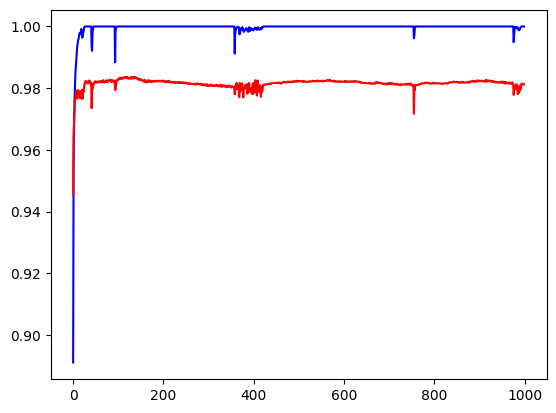

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
#loss = hist.history['loss']
#val_loss = hist.history['val_loss']

plt.plot(acc , color= 'blue')
plt.plot(val_acc , color= 'red')
#plt.plot(loss)
#plt.plot(val_loss)

plt.show()

Adding the epochs from 200 so on did not affect the model positively.



In [1]:
...


Ellipsis